Total Transactions: 312
Total Spent: $1,224.51


C:\Users\Galin Belchov\AppData\Local\Temp\ipykernel_17072\3641156715.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.transactions['UnitPrice'] = pd.to_numeric(self.transactions['UnitPrice'], errors='coerce')


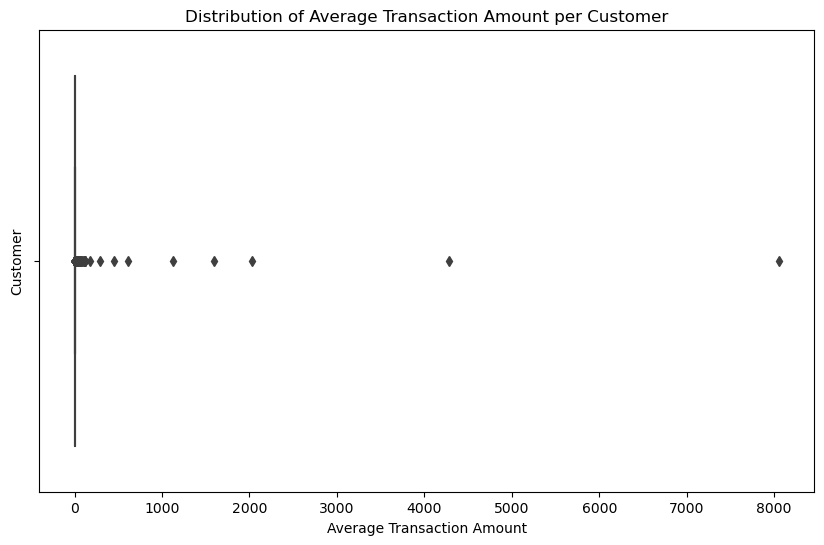

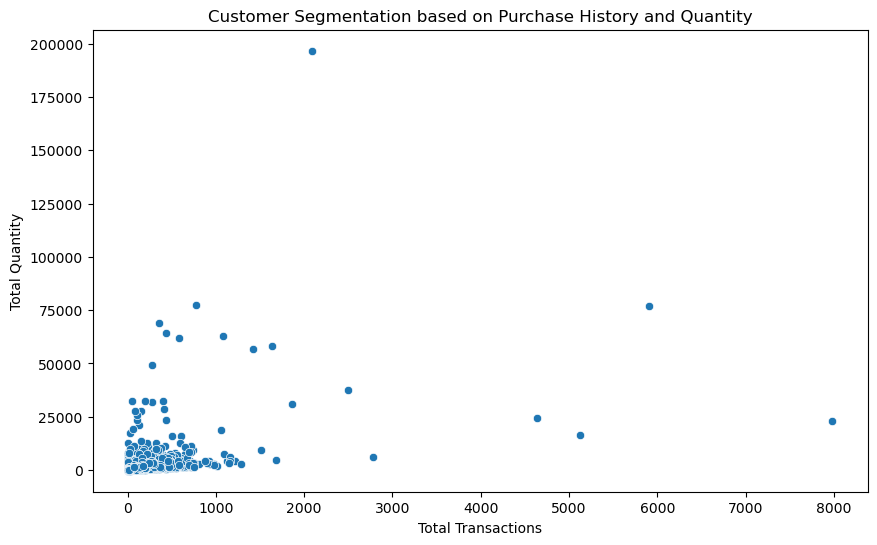

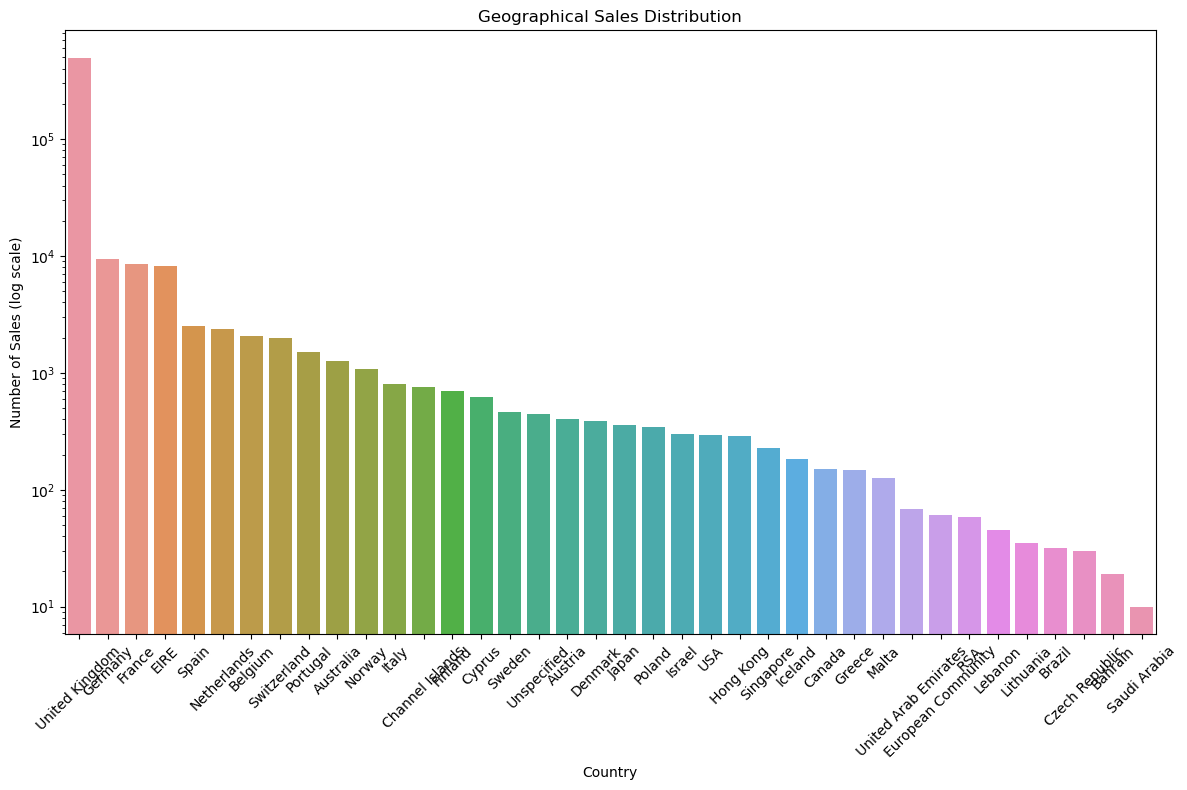

Spending Category: High Spender


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
dataset = pd.read_csv('C:/Users/Galin Belchov/Downloads/python project/Online_Retail.csv')

class Customer:
    def __init__(self, customer_id, country, transactions):
        """
        Initialize a Customer object.

        Parameters:
        - customer_id (int or str): The unique identifier for the customer.
        - country (str): The country associated with the customer.
        - transactions (pandas DataFrame): DataFrame containing transaction records for the customer.
        """
        self.customer_id = customer_id
        self.country = country
        self.transactions = transactions
        
    def total_transactions(self):
        """
        Calculate the total number of transactions made by the customer.

        Returns:
        - int: Total number of transactions made by the customer.
        """
        return len(self.transactions)
   
    def total_spent(self):
        """
        Calculate the total amount spent by the customer.

        Returns:
        - str: The total amount spent by the customer formatted as dollars.
        """
        # Convert 'TotalPrice' column to numeric data type
        self.transactions['UnitPrice'] = pd.to_numeric(self.transactions['UnitPrice'], errors='coerce')
        total_spent = self.transactions['UnitPrice'].sum()
        # Format the total spent amount as dollars for output
        formatted_total_spent = "${:,.2f}".format(total_spent)
        return formatted_total_spent
    
    def avg_transaction_amount(self):
        """
        Calculate the average transaction amount for the customer.

        Returns:
        - float: The average transaction amount for the customer.
        """
        return self.total_spent() / self.total_transactions()
    
    def avg_transaction_amounts_plot(self, dataset):
        """
        Calculate average transaction amount for each customer and plot it using a box plot.

        Parameters:
        - dataset (pandas DataFrame): DataFrame containing transaction records for all customers.
        """
        # Group transactions by customer ID
        grouped_customers = dataset.groupby('CustomerID')
        
        # Calculate average transaction amount for each customer
        average_transaction_amounts = grouped_customers['UnitPrice'].sum() / grouped_customers.size()
        
        # Convert to DataFrame
        avg_transaction_df = pd.DataFrame({'CustomerID': average_transaction_amounts.index, 'AverageTransactionAmount': average_transaction_amounts.values})
        
        # Plot the box plot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='AverageTransactionAmount', data=avg_transaction_df)
        plt.title('Distribution of Average Transaction Amount per Customer')
        plt.xlabel('Average Transaction Amount')
        plt.ylabel('Customer')
        plt.show()
        
    def customer_segmentation_plot(self, dataset):
        """
        Visualize customer segmentation based on purchase history and quantity.

        Parameters:
        - dataset (pandas DataFrame): DataFrame containing transaction records for all customers.
        """
        # Group transactions by customer ID
        grouped_customers = dataset.groupby('CustomerID')
        
        # Calculate total transactions and total quantity for each customer
        total_transactions = grouped_customers.size()
        total_quantity = grouped_customers['Quantity'].sum()
        
        # Create DataFrame for customer segmentation
        segmentation_df = pd.DataFrame({'CustomerID': total_transactions.index,
                                        'TotalTransactions': total_transactions.values,
                                        'TotalQuantity': total_quantity.values})
        
        # Plot the scatter plot
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='TotalTransactions', y='TotalQuantity', data=segmentation_df)
        plt.title('Customer Segmentation based on Purchase History and Quantity')
        plt.xlabel('Total Transactions')
        plt.ylabel('Total Quantity')
        plt.show()
    
    def country_distribution_plot(self, dataset):
        """
        Visualize geographical sales distribution.

        Parameters:
        - dataset (pandas DataFrame): DataFrame containing transaction records for all customers.
        """
        # Calculate sales distribution across different countries
        country_sales = dataset['Country'].value_counts()
        
        # Plot the bar plot with logarithmic scale on y-axis
        plt.figure(figsize=(12, 8))
        sns.barplot(x=country_sales.index, y=country_sales.values)
        plt.yscale('log')  # Set y-axis scale to logarithmic
        plt.title('Geographical Sales Distribution')
        plt.xlabel('Country')
        plt.ylabel('Number of Sales (log scale)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        
    def categorize_spending(self):
        """
        Categorize customers based on total transaction amount.

        Returns:
        - str: Spending category of the customer ('Low Spender', 'Medium Spender', 'High Spender', or 'Unknown').
        """
        total_spent = self.transactions['UnitPrice'].sum()
        
        # Handle cases where 'UnitPrice' might contain non-numeric values
        try:
            total_spent = float(total_spent)
        except ValueError:
            return 'Unknown'
        
        if total_spent < 100:
            return 'Low Spender'
        elif total_spent < 500:
            return 'Medium Spender'
        else:
            return 'High Spender'

if __name__ == "__main__":
    # Filter data for a specific customer (e.g., customer ID 17850.0)
    customer_id = 17850.0
    customer_data = dataset[dataset['CustomerID'] == customer_id]
    
    # Create an instance of the Customer class
    customer = Customer(
        customer_id=customer_id,
        country=customer_data['Country'].iloc[0],
        transactions=customer_data
    )
    
    # Call the functions
    print("Total Transactions:", customer.total_transactions())
    print("Total Spent:", customer.total_spent())
    customer.avg_transaction_amounts_plot(dataset)
    customer.customer_segmentation_plot(dataset)
    customer.country_distribution_plot(dataset)
    spending_category = customer.categorize_spending()
    print("Spending Category:", spending_category)